<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Мадина, привет!👋</b>   

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>
 
<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
 
<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

In [1]:
!pip install scikit-learn==1.1.3 -q

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В самом начале проекта замечательно было бы кратко в 2-3 предложениях описать суть задачи, а также в 4-5 пунктах набросать план проекта.
        
</div> 

In [2]:
#Подключим необходимые библиотеки для нашего анализа
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats as st
import seaborn as sns
import warnings

from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично по оформлению импортов.
</div> 
  

#Шаг 1. Загрузите и изучите данные

#### 1. Скачайте файлы и добавьте их датафреймы

In [3]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Чтобы считывать запятую в разделителе цифр можно уже на этапе загрузки определить разделитель:
    
`ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')`
</div>  
 

#### 2. Изучите признаки и данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости вы можете переименовать названия столбов, указав, какие названия использовались изначально.

In [4]:
df_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [5]:
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [6]:
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
df_dad.rename(columns={'Имя Папы': 'dads_name'}, inplace=True)
df_dad.columns

Index(['id', 'dads_name'], dtype='object')

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [10]:
df_main.rename(columns={
    'Удой, кг': 'yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'spo',
    'Порода': 'breed',
    'Тип пастбища': 'grazing_type',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat',
    'Белок,%': 'protein',
    'Вкус молока': 'taste',
    'Возраст': 'age'}, inplace=True)
df_main.columns

Index(['id', 'yield_kg', 'eke', 'protein_g', 'spo', 'breed', 'grazing_type',
       'dad_breed', 'fat', 'protein', 'taste', 'age'],
      dtype='object')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно. Сокращаем длинные названия.
</div> 

In [11]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [12]:
df_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'grazing_type',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dads_name',
    'Текущая_жирность,%': 'current_fat',
    'Текущий_уровень_белок,%': 'current_protein_level',
    'Возраст': 'age'}, inplace=True)
df_main.columns

Index(['id', 'yield_kg', 'eke', 'protein_g', 'spo', 'breed', 'grazing_type',
       'dad_breed', 'fat', 'protein', 'taste', 'age'],
      dtype='object')

# Шаг 2. Предобработка данных

#### Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

In [13]:
dfs = [df_main, df_dad, df_buy]

for df in dfs:
    print(f"Пропущенные значения: {df.isna().sum()}")
    print(f"Дубликаты: {df.duplicated().sum()}")
    print('')

Пропущенные значения: id              0
yield_kg        0
eke             0
protein_g       0
spo             0
breed           0
grazing_type    0
dad_breed       0
fat             0
protein         0
taste           0
age             0
dtype: int64
Дубликаты: 5

Пропущенные значения: id           0
dads_name    0
dtype: int64
Дубликаты: 0

Пропущенные значения: breed                    0
grazing_type             0
dad_breed                0
dads_name                0
current_fat              0
current_protein_level    0
age                      0
dtype: int64
Дубликаты: 4



In [14]:
df_main.drop_duplicates(inplace=True)
df_buy.drop_duplicates(inplace=True)


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
    
***

Предположу, что в таблице коров на покупку у нас все-таки разные коровы. Там мало признаков, категорий тоже немного - вероятность повторов ненулевая.
    
В случае сомнения нам выгоднее оставить здесь дубли: легче будет в дальнейшем их удалить, чем восстановить. Эта таблица в обучении моделей не участвует, так что дубли не критичны.
       
</div> 




In [15]:
for df in dfs:
    print(df.duplicated().sum())
    print('')

0

0

0



In [16]:
for df in dfs:
    display(df.dtypes)
    print('')

id               int64
yield_kg         int64
eke             object
protein_g        int64
spo             object
breed           object
grazing_type    object
dad_breed       object
fat             object
protein         object
taste           object
age             object
dtype: object

id            int64
dads_name    object
dtype: object

breed                    object
grazing_type             object
dad_breed                object
dads_name                object
current_fat              object
current_protein_level    object
age                      object
dtype: object

In [17]:
for df in dfs:
    display(df.head())
    print('')

,id,yield_kg,eke,protein_g,spo,breed,grazing_type,dad_breed,fat,protein,taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,dads_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь если выводить таблицу не через print(), а через display(), будет удобнее все воспринимать.
</div>  



In [18]:
columns_to_convert = ['eke', 'spo', 'fat', 'protein']
for col in columns_to_convert:
    df_main[col] = df_main[col].str.replace(',', '.').astype(float)
df_main[columns_to_convert] = df_main[columns_to_convert].astype(float)



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Если при загрузке определить разделитель, то это действие будет излишним. 
</div>  
  

In [19]:
df_main.dtypes

id                int64
yield_kg          int64
eke             float64
protein_g         int64
spo             float64
breed            object
grazing_type     object
dad_breed        object
fat             float64
protein         float64
taste            object
age              object
dtype: object

In [20]:
columns_to_convert = ['current_fat', 'current_protein_level']
for col in columns_to_convert:
    df_buy[col] = df_buy[col].str.replace(',', '.').astype(float)
df_buy[columns_to_convert] = df_buy[columns_to_convert].astype(float)

In [21]:
df_buy.dtypes

breed                     object
grazing_type              object
dad_breed                 object
dads_name                 object
current_fat              float64
current_protein_level    float64
age                       object
dtype: object

#### Вывод
Проверили данные на наличие пропусков, дубликатов и тип данных



1.   Дубликатов удалили с помощю drop_duplicates
2.   Нету пропусков
3. Поменяли там где надо с object на float64. Для удбства при расчетов.



# Шаг 3. Исследовательский анализ данных

#### 1. Проведите статистический анализ всех признаков.

In [22]:
df_main.describe()

,id,yield_kg,eke,protein_g,spo,fat,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [23]:
df_buy.describe()

,current_fat,current_protein_level
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


In [24]:
df_dad['dads_name'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dads_name, dtype: int64

#### 2. Постройте графики, которые описывают все признаки. Помните, что количественным и категориальным данным подходят разные графики.

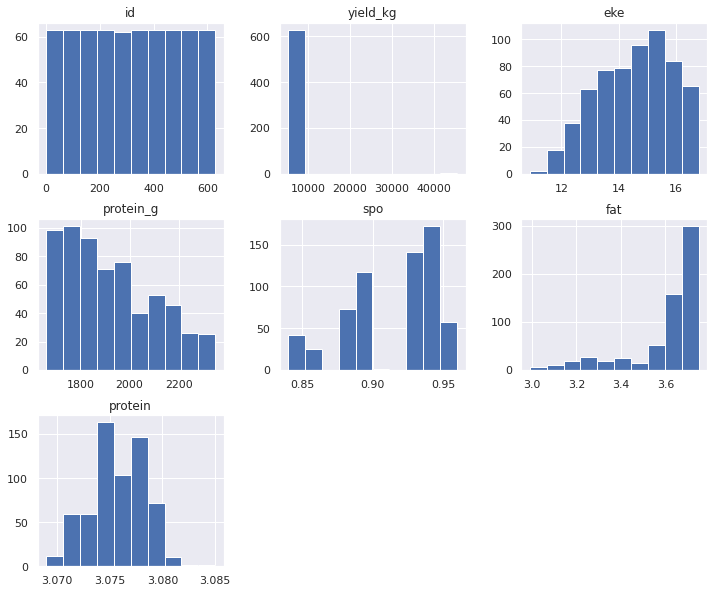

In [25]:
df_main.hist(figsize=(12, 10));

Удалаем большой выброс yield_kg так как сильно искажает график

In [26]:
filtered_data_df_main = df_main[(df_main['yield_kg'] <= 7500)]
filtered_data_df_main['yield_kg'].max()

7222

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично.
</div>

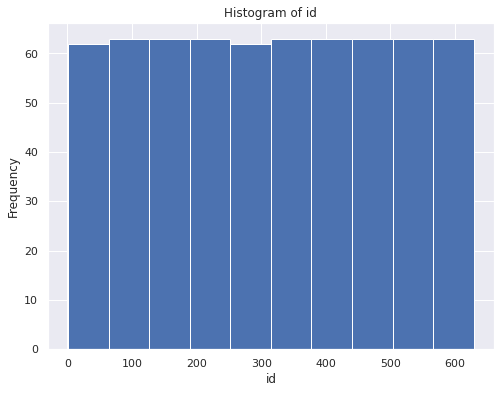

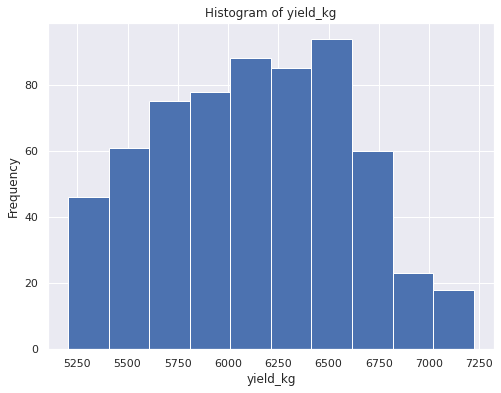

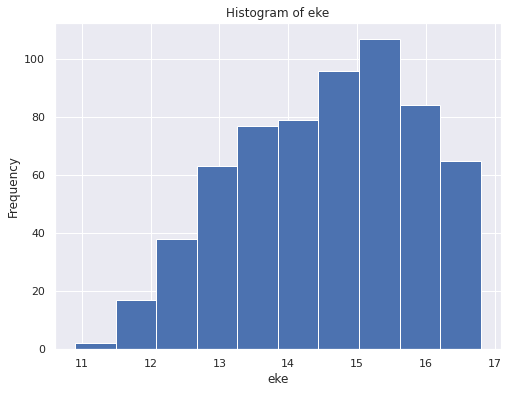

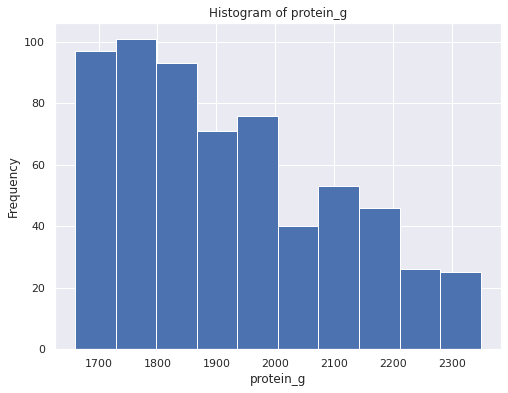

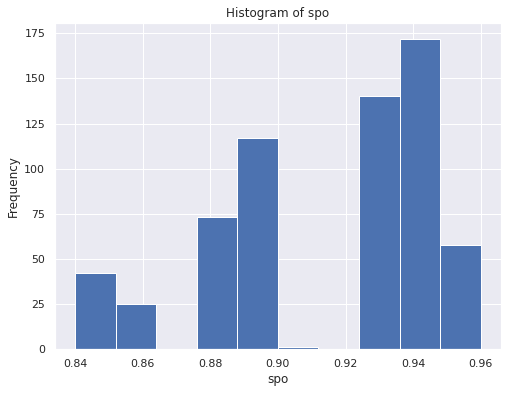

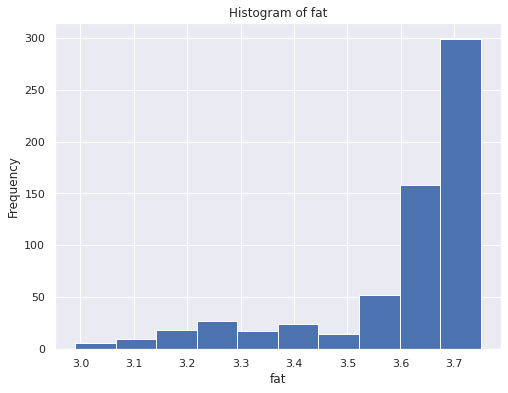

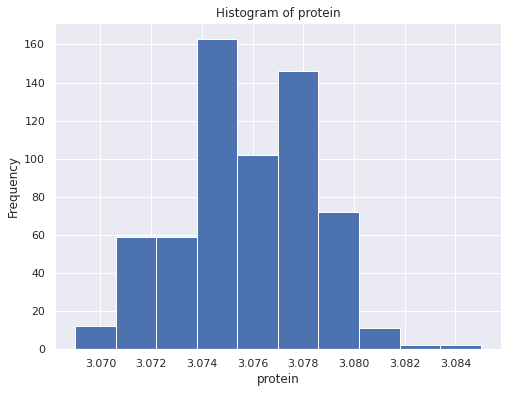

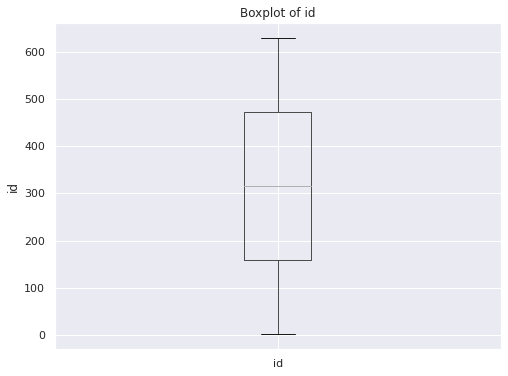

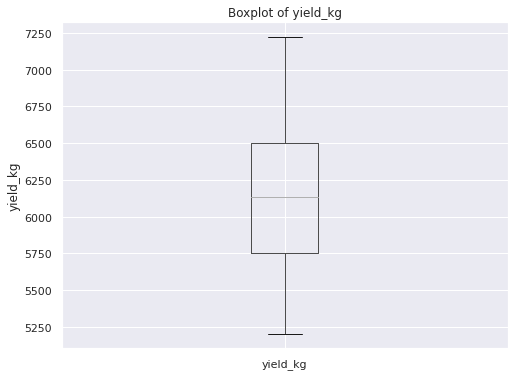

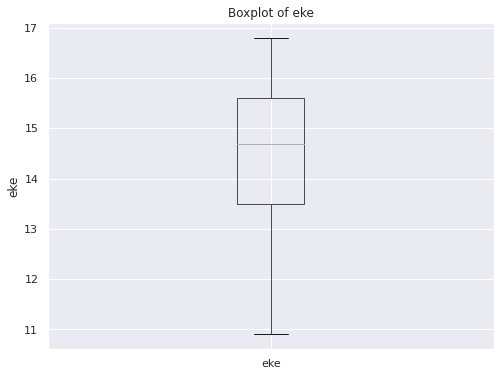

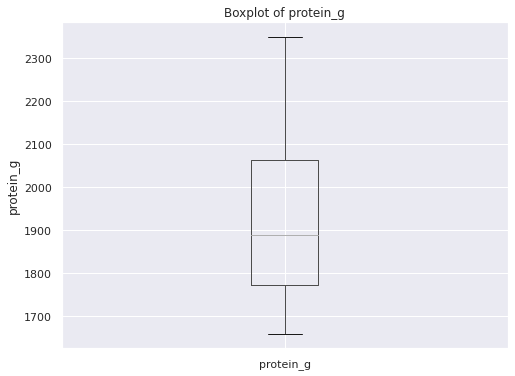

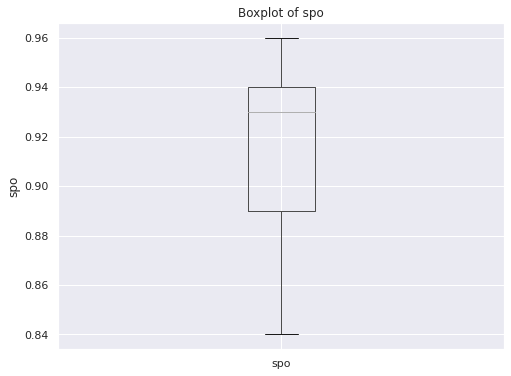

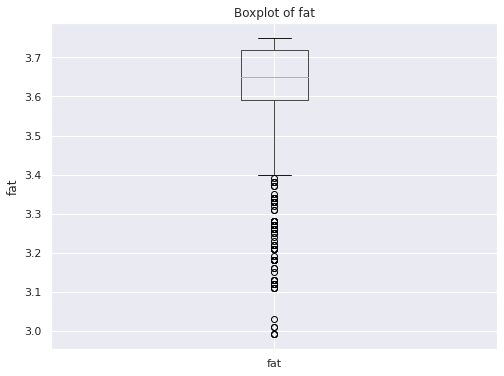

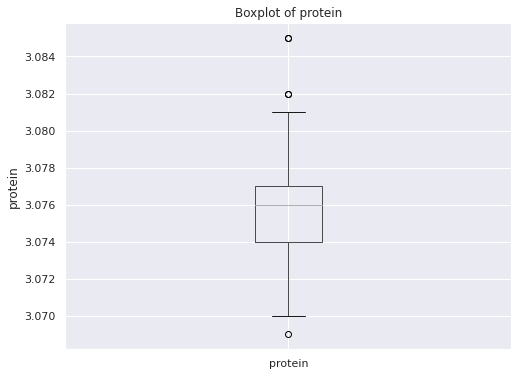

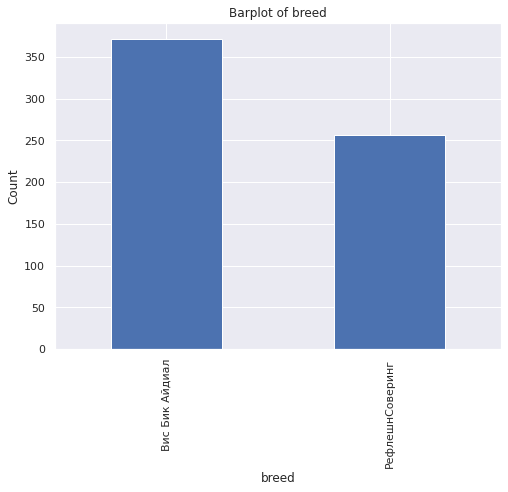

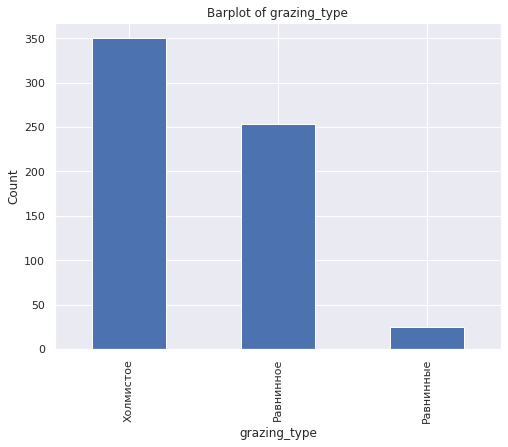

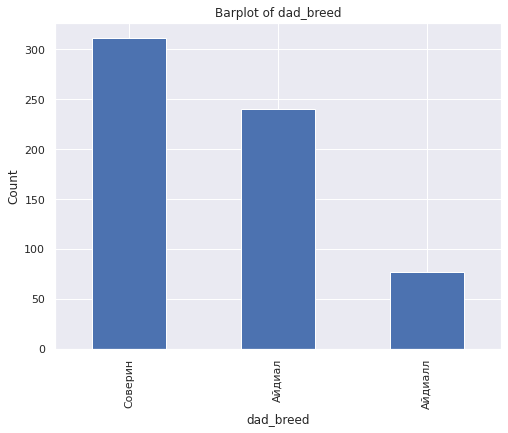

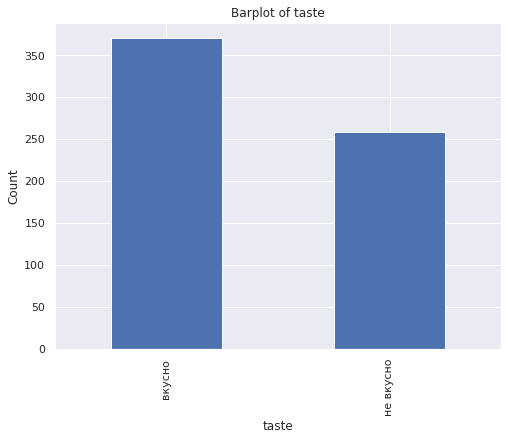

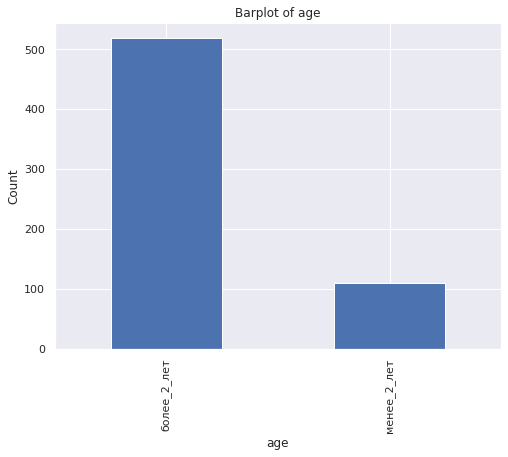

In [27]:
# Выбираем количественные и категориальные признаки
numeric_columns = filtered_data_df_main.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = filtered_data_df_main.select_dtypes(include=['object']).columns

# Строим гистограммы для количественных признаков
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    filtered_data_df_main[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Строим ящики с усами для количественных признаков
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    filtered_data_df_main.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

# Строим столбчатые диаграммы для категориальных признаков
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    filtered_data_df_main[col].value_counts().plot(kind='bar')
    plt.title(f'Barplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


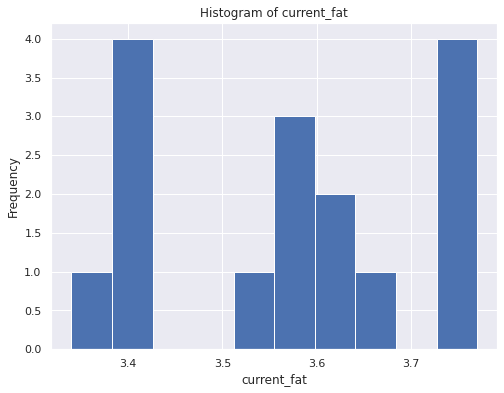

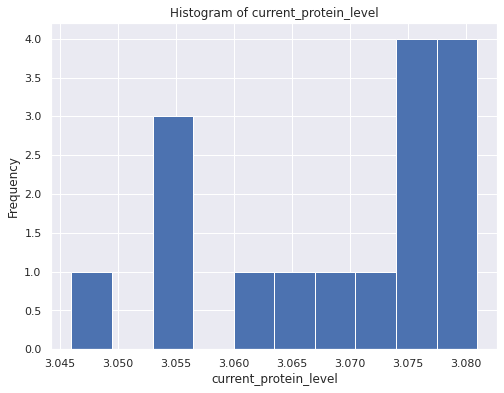

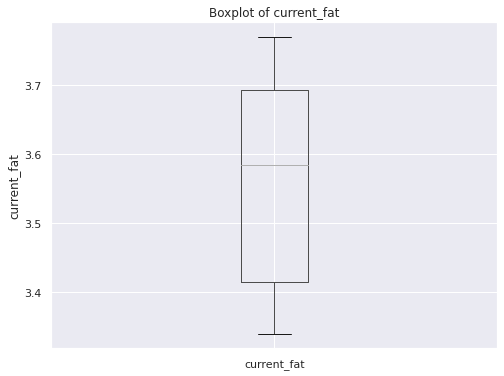

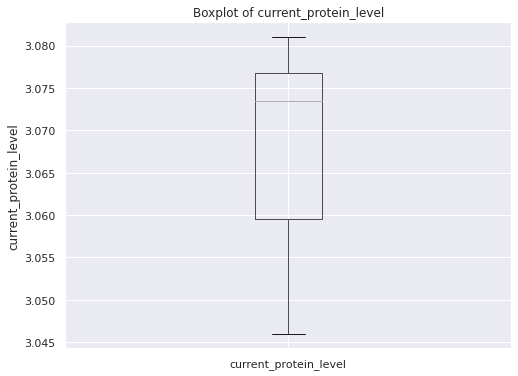

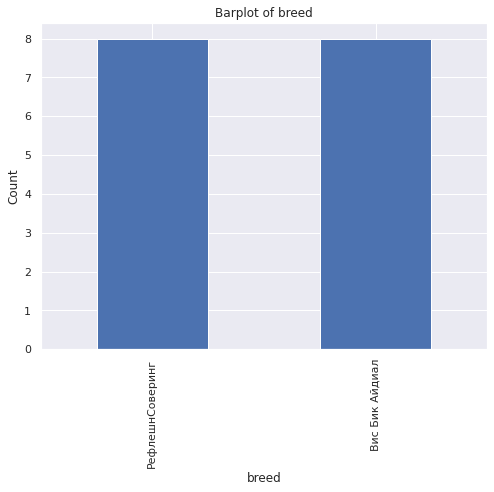

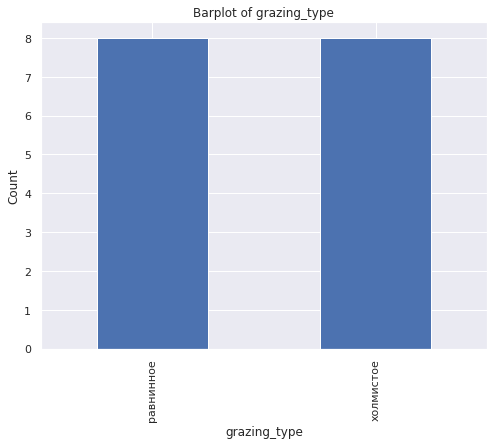

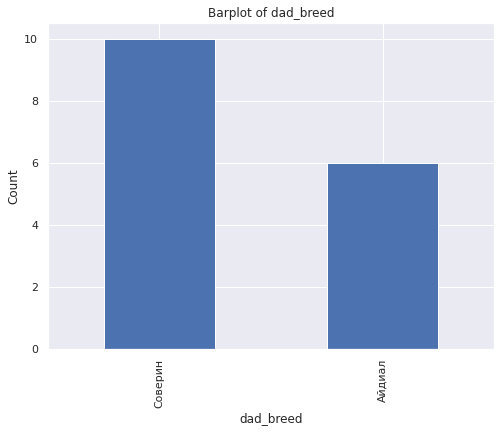

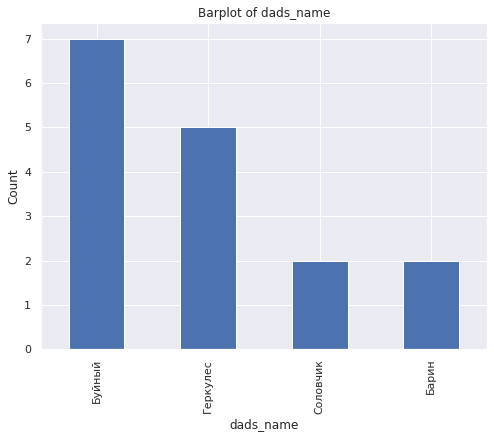

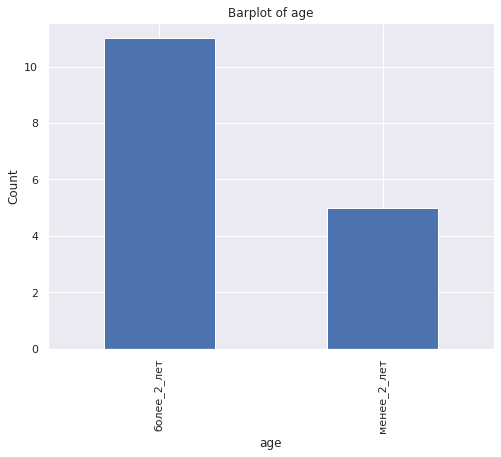

In [28]:
# Выбираем количественные и категориальные признаки
numeric_columns = df_buy.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_buy.select_dtypes(include=['object']).columns

# Строим гистограммы для количественных признаков
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    df_buy[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Строим ящики с усами для количественных признаков
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    df_buy.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

# Строим столбчатые диаграммы для категориальных признаков
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    df_buy[col].value_counts().plot(kind='bar')
    plt.title(f'Barplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dads_name, dtype: int64

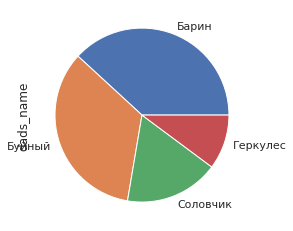

In [29]:
df_dad['dads_name'].value_counts().plot(kind='pie');
df_dad['dads_name'].value_counts()

#### Вывод
**Анализ количественных показателей**
- yield_kg в датафрейме ferma_main:
Обнаружен значительный выброс, составляющий приблизительно 45 тонн молока, что указывает на потенциальную ошибку ввода данных или исключительное событие. Распределение данного показателя характеризуется асимметрией.
- eke в датафрейме ferma_main:
Выбросы отсутствуют, однако распределение показателя является асимметричным.
- 'protein_g в датафрейме ferma_main:
Выбросы не обнаружены, распределение асимметрично.
- 'spo' в датафрейме ferma_main:
Отсутствие выбросов с асимметричным распределением.
- 'fat' в датафрейме ferma_main:
Присутствует значительное количество выбросов ниже первой квартили, что может указывать на ошибки измерения или записи данных. Распределение асимметрично.
- protein в датафрейме ferma_main:
Наблюдаются единичные выбросы, тем не менее, распределение признака близко к нормальному.

**Анализ количественных показателей в датафрейме cow_buy**

- current_fat и current_protein:
В связи с ограниченным объемом данных, выбросы отсутствуют.

**Анализ категориальных признаков**

- В датафреймах ferma_main и cow_buy к категориальным признакам относятся: порода, тип пастбища, порода папы, а также вкус и возраст в ferma_main и возраст и имя папы в cow_buy. Данные признаки не вызывают подозрений на предвзятость или неадекватность.

**Рекомендации**

- Улучшение качества данных: Необходимо устранить выбросы для признаков "yield_kg" и "fat", что позволит повысить точность аналитических моделей и уменьшить влияние аномалий на результаты анализа.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично, что комментируешь характер распределения данных.
</div>    


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Вижу, что ниже удаляем выброс в удое. Однако правильнее будет сделать так: удаляем выброс выше, затем строим графики (где есть гистограмма с удоем), анализируем удой. Иначе график сильно искажен и мы не можем его корректно описать. Нормально ли распределены признаки? 

</div>


# Шаг 4. Проведите корреляционный анализ признаков в датасете

#### Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

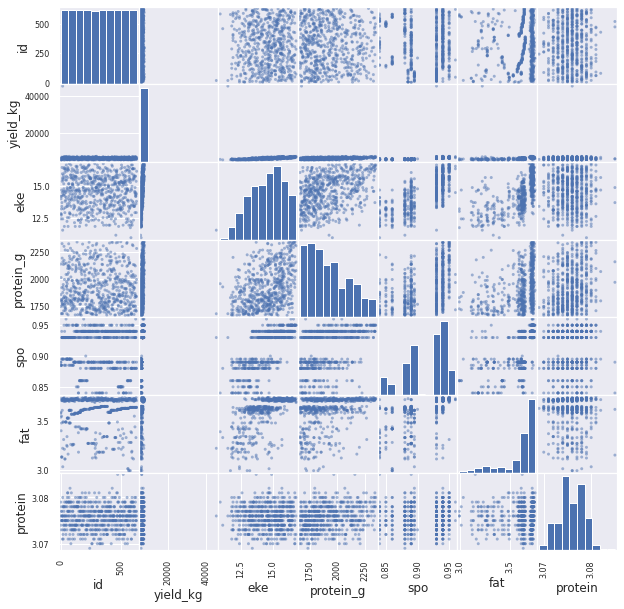

In [30]:
pd.plotting.scatter_matrix(df_main, figsize=(10, 10))
plt.show()

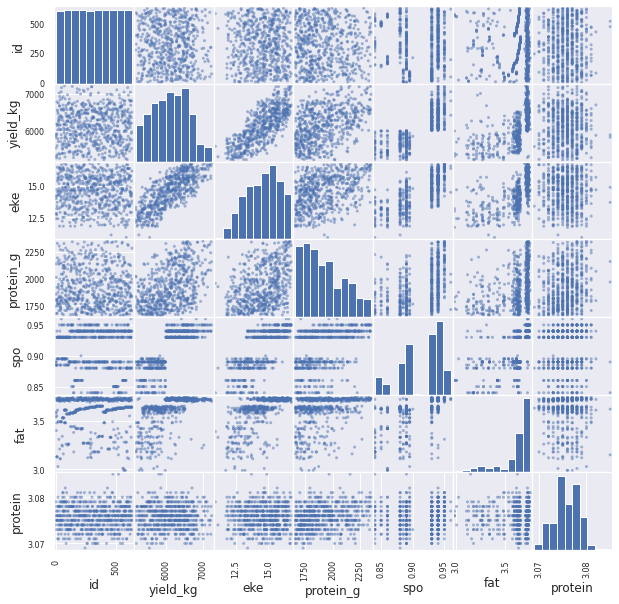

In [31]:
pd.plotting.scatter_matrix(filtered_data_df_main, figsize=(10, 10))
plt.show()

На диаграммах рассеяния нет явной линейной зависимости между удоем и большинством других переменных. Для многих переменных данные разбросаны равномерно или образуют нелинейные узоры, что указывает на отсутствие прямой линейной зависимости. Особенно это заметно для таких переменных, как id, protein, и fat, где точки данных распределены широко без явного направленного тренда.

Однако есть переменные, для которых данные показывают некоторый тренд или образуют более узкие области концентрации, что может указывать на возможную, хотя и не идеальную, линейную зависимость. Например, переменная protein_g показывает увеличение концентрации данных по мере увеличения yield_kg, что может свидетельствовать о наличии некоторой степени зависимости.

В целом, данные показывают, что большинство количественных признаков не демонстрируют строгую линейную зависимость от удоя. Это может быть связано с множеством факторов, влияющих на каждую переменную помимо удоя, и с потенциальной сложностью взаимосвязей в данных.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь также из-за искажения по удою почти все графики бесполезны. Важно выше удалить аномалию, а здесь прокомментировать, все ли количественные признаки линейно зависимы от удоя.

</div>


In [32]:
def p_estimation(p):
    if p < 0.05:
        print('Коэффициент корреляции является статистически значимым')
    else:
        print('Коэффициент корреляции не является статистически значимым')
def rho_estimation(rho):
    if rho < 0.1:
        print('Мужду рассматриваемыми признаками нет корреляции')
    elif rho < 0.3:
        print('Мужду рассматриваемыми признаками наблюдается слабая корреляция')
    elif rho < 0.5:
        print('Мужду рассматриваемыми признаками наблюдается умеренная корреляция')
    elif rho < 0.7:
        print('Мужду рассматриваемыми признаками наблюдается заметная корреляция')
    elif rho < 0.9:
        print('Мужду рассматриваемыми признаками наблюдается высокая корреляция')
    else:
        print('Мужду рассматриваемыми признаками наблюдается весьма высокая корреляция')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции Спирмена:  0.7567914127729641
P-value:  7.043892949396096e-118
Коэффициент корреляции является статистически значимым

Мужду рассматриваемыми признаками наблюдается высокая корреляция


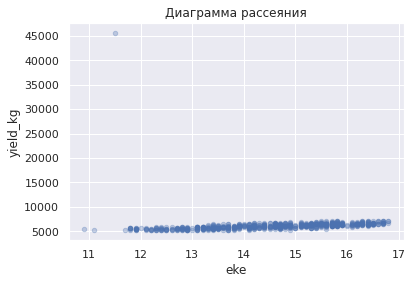

In [33]:
rho, p = spearmanr(df_main['yield_kg'], df_main['eke'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)
p_estimation(p)
df_main.plot(kind='scatter', x='eke', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(rho)
plt.show()

In [34]:
filtered_data_df_main = df_main[(df_main['yield_kg'] <= 7500)]
filtered_data_df_main['yield_kg'].max()

7222

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции Спирмена:  0.7651443116006692
P-value:  8.359783320590403e-122
Коэффициент корреляции является статистически значимым

Мужду рассматриваемыми признаками наблюдается высокая корреляция


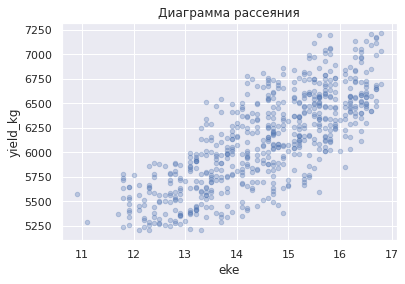

In [35]:
rho, p = spearmanr(filtered_data_df_main['yield_kg'], filtered_data_df_main['eke'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)
p_estimation(p)
filtered_data_df_main.plot(kind='scatter', x='eke', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(rho)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции Спирмена:  0.43754251989802084
P-value:  9.395930002891475e-31
Коэффициент корреляции является статистически значимым

Мужду рассматриваемыми признаками наблюдается умеренная корреляция


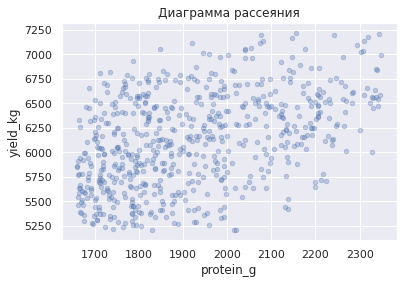

In [36]:
rho, p = spearmanr(filtered_data_df_main['yield_kg'], filtered_data_df_main['protein_g'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)
p_estimation(p)
filtered_data_df_main.plot(kind='scatter', x='protein_g', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(rho)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции Спирмена:  0.787904090851949
P-value:  6.236376891916343e-134
Коэффициент корреляции является статистически значимым

Мужду рассматриваемыми признаками наблюдается высокая корреляция


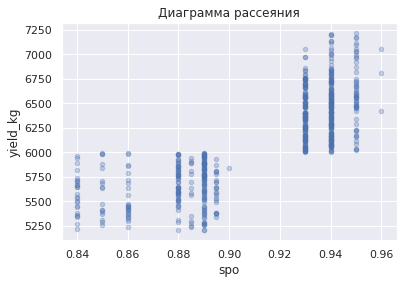

In [37]:
rho, p = spearmanr(filtered_data_df_main['yield_kg'], filtered_data_df_main['spo'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)
p_estimation(p)
filtered_data_df_main.plot(kind='scatter', x='spo', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(rho)
plt.show()

Коэффициент корреляции Спирмена:  0.688505794761783
P-value:  2.1035311214189552e-89
Коэффициент корреляции является статистически значимым


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Мужду рассматриваемыми признаками наблюдается заметная корреляция


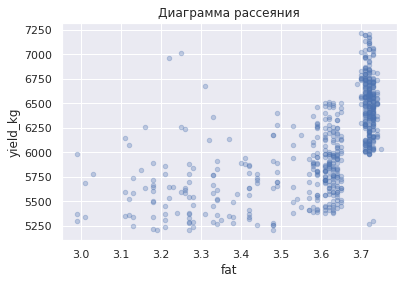

In [38]:
rho, p = spearmanr(filtered_data_df_main['yield_kg'], filtered_data_df_main['fat'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)
p_estimation(p)
filtered_data_df_main.plot(kind='scatter', x='fat', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(rho)
plt.show()

Коэффициент корреляции Пирсона:  0.4467312546088666


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Мужду рассматриваемыми признаками наблюдается умеренная корреляция


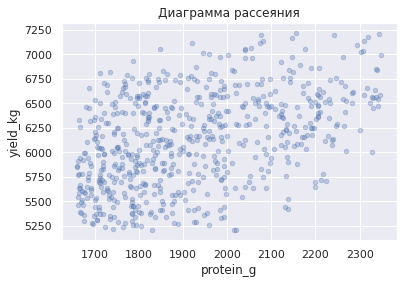

In [39]:
k = filtered_data_df_main['yield_kg'].corr(filtered_data_df_main['protein_g'])
print('Коэффициент корреляции Пирсона: ', k)
filtered_data_df_main.plot(kind='scatter', x='protein_g', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
print()
rho_estimation(k)
plt.show()

**Категориальные признаки**

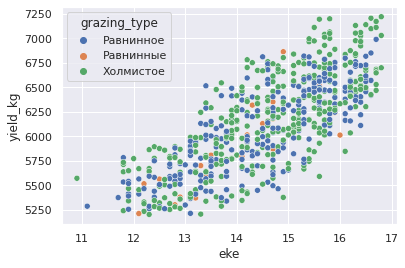

In [40]:
sns.scatterplot(data=filtered_data_df_main, x='eke', y='yield_kg', hue='grazing_type')
plt.show()

Упустили неявных дубликатов но не поздо исправить

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
В целом хорошо, что нашли. Но важно все делать в свой черед. Удаление аномалий и дубликатов мы делаем на шаге предобработки данных. 
    
Сначала очищаем данные, потом анализируем. Принцип GIGO. 

</div>


In [41]:
filtered_data_df_main['grazing_type'] = filtered_data_df_main['grazing_type'].replace('Равнинные', 'Равнинное')

/tmp/ipykernel_147/2254897518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df_main['grazing_type'] = filtered_data_df_main['grazing_type'].replace('Равнинные', 'Равнинное')


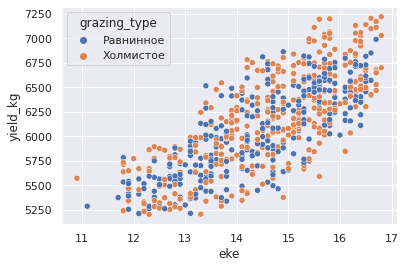

In [42]:
sns.scatterplot(data=filtered_data_df_main, x='eke', y='yield_kg', hue='grazing_type')
plt.show()

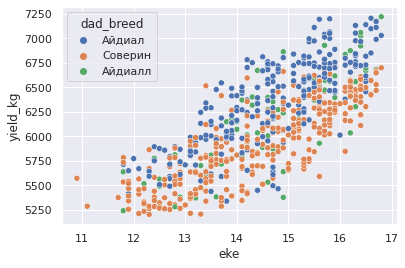

In [43]:
sns.scatterplot(data=filtered_data_df_main, x='eke', y='yield_kg', hue='dad_breed')
plt.show()

опять неявные дубликаты!

In [44]:
filtered_data_df_main['dad_breed'] = filtered_data_df_main['dad_breed'].replace('Айдиал', 'Айдиалл')

/tmp/ipykernel_147/2052043533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df_main['dad_breed'] = filtered_data_df_main['dad_breed'].replace('Айдиал', 'Айдиалл')


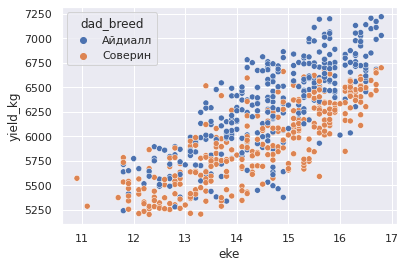

In [45]:
sns.scatterplot(data=filtered_data_df_main, x='eke', y='yield_kg', hue='dad_breed')
plt.show()

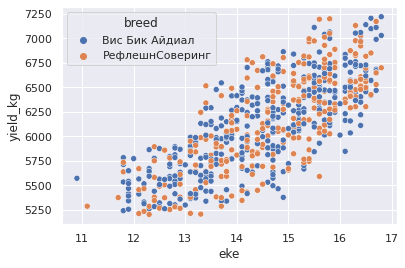

In [46]:
sns.scatterplot(data=filtered_data_df_main, x='eke', y='yield_kg', hue='breed')
plt.show()

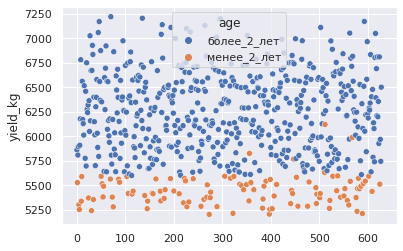

In [47]:
sns.scatterplot(data=filtered_data_df_main, x=filtered_data_df_main.index, y='yield_kg', hue='age')
plt.show()

#### Вывод
На основании представленных данных и диаграмм рассеяния можно сделать следующие научно обоснованные выводы о взаимосвязях между целевым признаком "удой (кг)" и другими переменными:

1. **Линейная корреляция:**
   - Между целевым признаком "удой (кг)" и переменной "сырой протеин (г)" наблюдается линейная зависимость. Это указывает на прямую пропорциональность удоя к количеству протеина, что может быть обусловлено его важной ролью в продуктивности молочных животных.

2. **Нелинейные связи:**
   - Целевой признак демонстрирует нелинейные зависимости с такими переменными, как ЭКЕ (энергетическая корректировка удоя), СПО (содержание сырого протеина в организме), жирность и белок в процентном отношении. Эти сложные взаимосвязи могут отражать различные биологические процессы, влияющие на удой, которые не поддаются простому линейному описанию.

3. **Корреляционный анализ:**
   - Сильная корреляция с признаками ЭКЕ, СПО и возрастом подтверждает их значимость в определении удоя. Умеренная корреляция с "сырым протеином (г)" и породой отца указывает на их влияние, но в меньшей степени. Слабая корреляция с жирностью, белком, породой и типом пастбища может свидетельствовать о косвенном или менее значимом влиянии этих факторов.

4. **Масштабирование и трансформация переменных:**
   - Нелинейные связи между признаками могут быть частично обусловлены различиями в масштабах переменных. Проведение масштабирования или трансформации признаков может помочь улучшить интерпретируемость моделей и повысить точность прогнозирования.

5. **Мультиколлинеарность:**
   - Хотя наблюдается потенциальная связь между ЭКЕ и "сырым протеином (г)", отсутствие высокой степени линейной корреляции между ними и другими входными признаками свидетельствует об отсутствии значимой мультиколлинеарности. Это позволяет использовать все рассматриваемые признаки в аналитических моделях без риска искажения результатов из-за высокой взаимной корреляции.

Таким образом, анализ показывает, что для адекватного моделирования взаимосвязи между удоем и входными переменными потребуется учет как линейных, так и нелинейных связей, а также возможное введение методов масштабирования и трансформации данных для более точного и стабильного описания наблюдаемых явлений.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно. Отличный подробный и корректный вывод.
</div>  
  

# Шаг 5. Задача регрессии

#### 1. Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.

(471, 7)
(157, 7)
(471,)
(157,)
R2 LinearRegression = 0.7844078173416966


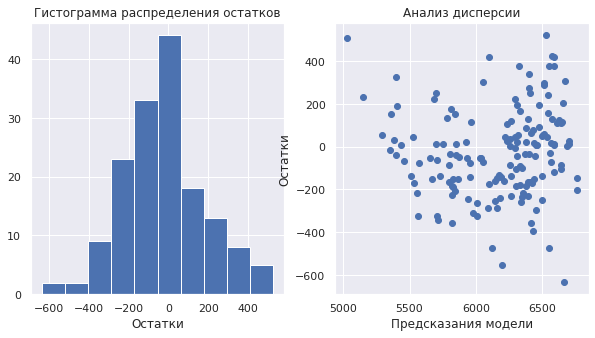

In [48]:
y = filtered_data_df_main['yield_kg'] #целевой
X = filtered_data_df_main[['eke', 'protein_g', 'spo', 'breed', 'grazing_type', 'age', 'dad_breed']]
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['breed', 'grazing_type','age', 'dad_breed']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
num_col_names = ['eke', 'protein_g', 'spo']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

r2_lr = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2_lr)
residuals = residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Выбор 'yield_kg' в качестве целевого признака и выбранных переменных ('eke', 'protein_g', 'spo', 'breed', 'grazing_type', 'age', 'dad_breed') в качестве входных признаков может быть обусловлен несколькими причинами:

Целевой признак ('yield_kg'): 

'yield_kg' или удой молока является важным показателем в сельскохозяйственных исследованиях, особенно в молочном скотоводстве. Он отражает производительность животных и может быть ключевым показателем для различных анализов, направленных на улучшение селекционных практик, питания и управления стадом.

Входные признаки:

'eke' (энергетический коэффициент): Энергия, потребляемая животными, напрямую влияет на их производительность, в том числе на удой молока.

'protein_g' (количество потребляемого белка): Белок является важным компонентом диеты, способствующим росту и продуктивности животных.

'spo' (содержание соматических клеток в молоке): Этот показатель может быть индикатором здоровья животного и качества молока, что, в свою очередь, может влиять на удой.

'breed' (порода): Генетические особенности пород могут значительно влиять на удой, что делает этот признак важным для анализа.

'grazing_type' (тип выпаса): Условия содержания и кормления животных также влияют на их здоровье и продуктивность.

'age' (возраст): Продуктивность животных может изменяться в зависимости от возраста, поскольку с возрастом могут изменяться физиологические и метаболические процессы.

'dad_breed' (порода отца): Генетические аспекты также могут быть важны, так как комбинация пород родителей может влиять на продуктивные качества потомства. 
    

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Жирность и белок в молоке - характеристики самого молока, а не питания коровы. Эти харакетристики зависят от питания, породы итд - и коррелируют с удоем, но не связаны с ним причинно-следственными связями и не влияют на него. Нам важно отобрать те признаки, которые влияют на таргет.
    
(здесь также логика в том, что с изменением питания у нас должны бы измениться и жирность молока. Однако мы не можем задним числом пересчитать ожидаемые параметры молока для стада фермера и для случая, если бы он кормил свое стадо так, как собирается кормить новых коров. Поэтому брать признаки корма не стоит).
    
Так как у нас неплохой набор признаков, которые определяют удой, то я бы не стал здесь в моделях использовать жирность и белок - эти признаки скорее будут вносить шум и провоцировать модель находить ложные зависимости.
    

</div>


<div class="alert alert-warning">
<h2><s> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По выбору признаков все верно. 
    
По комментарию: `# беру все качества. Просто посмоттреть...` - не совсем понятно, к чему он тут и почему не соответствует решению? 
    
Правильно будет в текстовой ячейке аргументировать выбор признаков.
         
</div> 

**Вывод 1 Модели**
1. R2 = 0,7844 модель хорошо себя показывает в 78% случаев.
2. наличие более выраженной левой асимметрии (больше отрицательных остатков) предполагает, что модель может систематически переоценивать значения. линейная модель не полностью адекватна или что в данных присутствуют факторы, усугубляющие дисперсию ошибок.
3. нужны дополнительные исследования.



#### Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


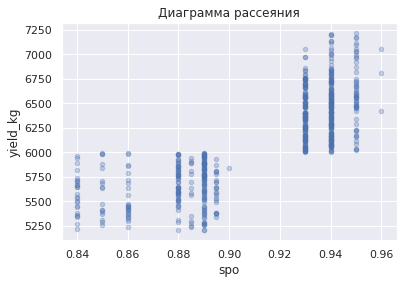

In [49]:
filtered_data_df_main.plot(kind='scatter', x='spo', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

Переведем СПО в категориальный признак. Из диаграммы рассеяния видно, что граница проходит в интервале от 0.9 до 0.93. Выберем за границу 0.92 и поделим СПО на 2 категории: "менее_0.92" и "более_0.92".

In [50]:
filtered_data_df_main['spo'] = filtered_data_df_main['spo'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')

/tmp/ipykernel_147/770172160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df_main['spo'] = filtered_data_df_main['spo'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


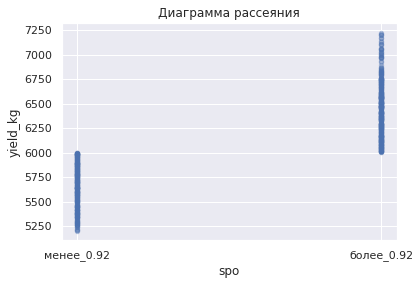

In [51]:
filtered_data_df_main.plot(kind='scatter', x='spo', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

Мы обнаружили, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

/tmp/ipykernel_147/3986655821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df_main['eke_new'] = filtered_data_df_main['eke'].apply(lambda x: x**2)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


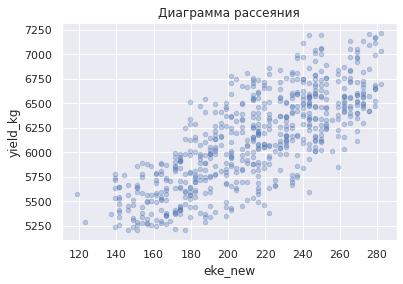

In [52]:
filtered_data_df_main['eke_new'] = filtered_data_df_main['eke'].apply(lambda x: x**2)
filtered_data_df_main.plot(kind='scatter', x='eke_new', y='yield_kg', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Точно 
</div>  
      

(471, 7)
(157, 7)
(471,)
(157,)
R2 LinearRegression = 0.8180879926867501


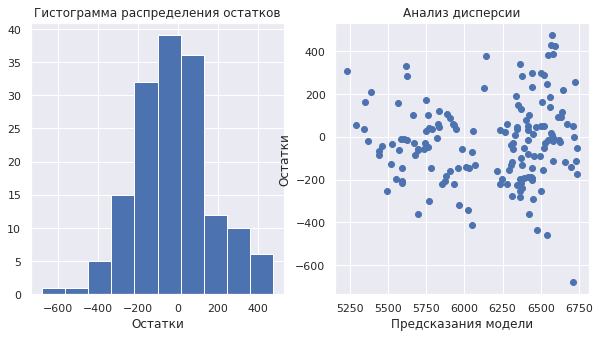

In [53]:
y = filtered_data_df_main['yield_kg'] #целевой
X = filtered_data_df_main[['eke_new', 'protein_g', 'spo', 'breed', 'grazing_type', 'age', 'dad_breed']] # беру все качества. Просто посмотреть как будет себя вести.

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['spo', 'breed', 'grazing_type', 'age', 'dad_breed']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)

r2_lr_2 = r2_score(y_test, predictions_2)
print("R2 LinearRegression =", r2_lr_2)
residuals_2 = y_test - predictions_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод**
1. R2_2 = 0.8180879926867501, больше на 3%
2. с некоторым смещением влево, что может указывать на небольшое систематическое недооценивание результатов моделью. дисперсии остатков показывает, что остатки не полностью случайны: виден некоторый тренд в увеличении абсолютного значения остатков с увеличением значений предсказаний. Это может свидетельствовать о наличии гетероскедастичности, что является признаком того, что модель не полностью учитывает все факторы влияния, особенно при больших значениях предсказаний.
3. Попробовать с новым признаком может улучшить ситуацию

#### Добавьте в данные новый признак и обучите на них третью модель LinearRegression.



In [54]:
df_ferma = filtered_data_df_main.merge(df_dad, on='id', how='left')
df_ferma.tail()

,id,yield_kg,eke,protein_g,spo,breed,grazing_type,dad_breed,fat,protein,taste,age,eke_new,dads_name
623,625,6812,15.4,1964,более_0.92,РефлешнСоверинг,Равнинное,Айдиалл,3.74,3.075,не вкусно,более_2_лет,237.16,Буйный
624,626,5513,12.9,1700,менее_0.92,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,Барин
625,627,5970,14.4,1837,менее_0.92,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,Барин
626,628,5746,13.8,1994,менее_0.92,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,Барин
627,629,6503,16.2,2283,более_0.92,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет,262.44,Соловчик


(471, 8)
(157, 8)
(471,)
(157,)
R2 LinearRegression = 0.8247542745210406


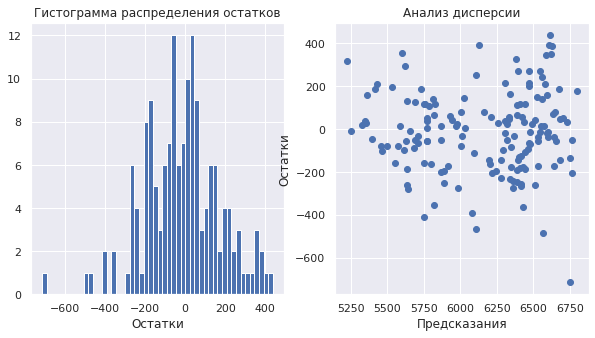

In [55]:
y = df_ferma['yield_kg'] #целевой
X = df_ferma[['eke_new', 'protein_g', 'spo', 'breed', 'grazing_type', 'age', 'dad_breed', 'dads_name']] # беру все качества. Просто посмотреть как будет себя вести.

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['spo', 'breed', 'grazing_type', 'age', 'dad_breed', 'dads_name']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)
r2_lr_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression =", r2_lr_3)
residuals_3 = y_test - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals_3)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

**Вывод**
1. R2 = 0.8247542745210406, на 1% лучше модели 2
2. Остатки имеют симметричное нормальное распределение. Добавление нового признака убрало асимметрию распределения ошибок. Это означает, что модель стала точнее.
При анализе дисперсии ошибок при различных прогнозах можно заметить, что она более стабильна по сравнению с первой моделью. И немного стабильнее второй.
Опираясь на приведенный результат, можно сказать, что третья модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет ещэ одного входного признака повлияло на модель в лучшую сторону.
3. Вроде самая лучшая модель из трех

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Вроде самая лучшая)
</div>  
      

#### Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

**Коэффициент детерминации:**

первая модель: R2 = 0.784;
вторая модель: R2 = 0.818;
третья модель: R2 = 0.824.

**Остатки:**

Первая модель:

Остатки имеют асимметричное нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения. При анализе дисперсии ошибок при различных прогнозах можно отметить, что модель чаще или сильнее ошибается, предсказывая удой сильно выше или сильно ниже среднего. То есть она непостоянная. Это говорит о неточности модели.

Вторая модель:

Остатки имеют асимметричное нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения. При этом это смещение оказалось меньше, чем у предыдущей модели. При анализе дисперсии ошибок при различных прогнозах можно заметить, что она стала более стабильной по сравнению с предыдущей моделью.

Третья модель:

Остатки имеют симметричное нормальное распределение. Добавление нового признака убрало асимметрию распределения ошибок. Это означает, что модель стала точнее. При анализе дисперсии ошибок при различных прогнозах можно заметить, что она более стабильна по сравнению с первой моделью. И немного стабильнее второй.

#### Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse_1 = mean_squared_error(y_test, predictions)
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
mae_1 = mean_absolute_error(y_test, predictions)
print('First model MSE = ', mse_1)
print('First model RMSE = ', rmse_1)
print('First model MAE = ', mae_1)

First model MSE =  43887.01500966053
First model RMSE =  209.49227911706086
First model MAE =  164.2419446347493


In [57]:
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test, predictions_2)
print('Second model MSE = ', mse_2)
print('Second model RMSE = ', rmse_2)
print('Second model MAE = ', mae_2)

Second model MSE =  37030.91131113696
Second model RMSE =  192.43417396901455
Second model MAE =  149.03965222364607


In [58]:
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)
print('Third model MSE = ', mse_3)
print('Third model RMSE = ', rmse_3)
print('Third model MAE = ', mae_3)

Third model MSE =  35673.88988618197
Third model RMSE =  188.87532895055926
Third model MAE =  146.16302445362322


Третья модель имеет наименьшие показатели ошибок из всех трех рассматриваемых. Поэтому она будет самой точной.

In [59]:
st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

(6091.835660789232, 6221.879485123439)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Все верно.
</div>  
      

In [60]:
eke = df_main['eke'].mean()
spo = df_main['spo'].mean()
sp = df_main['protein_g'].mean()
df_buy['eke'] = eke * 1.05
df_buy['protein_g'] = sp * 1.05
df_buy['spo'] = spo * 1.05

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По добавлению признаков корма можно использовать чуть компактнее:
    
`df_на_покупку[['признак1,' 'признак2,' 'признак3']] = \
                df_коровы_фермера[['признак1,' 'признак2,' 'признак3']].mean()*1.05`
       
</div> 


In [61]:
cow_buy_copy = df_buy.copy()

In [62]:
cow_buy_copy['spo'] = df_buy['spo'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cow_buy_copy['eke_new'] = df_buy['eke'].apply(lambda x: x**2)

In [63]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names =  ['spo', 'breed', 'grazing_type', 'age', 'dad_breed', 'dads_name']
cow_buy_ohe = encoder.fit_transform(cow_buy_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

In [64]:
scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g']
cow_buy_scaled = scaler.fit_transform(cow_buy_copy[num_col_names])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [65]:
cow_buy_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
cow_buy_new.insert(loc=0,
                   column='x0_менее_0.92',
                   value = 0.0)
cow_buy_new.tail()

,x0_менее_0.92,breed_РефлешнСоверинг,grazing_type_холмистое,age_менее_2_лет,dad_breed_Соверин,dads_name_Буйный,dads_name_Геркулес,dads_name_Соловчик,eke_new,protein_g
11,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [66]:
cow_buy_new.columns = ['spo_менее_0.92',
                       'breed_РефлешнСоверинг',
                       'grazing_type_Холмистое',
                       'age_менее_2_лет',
                       'dad_breed_Соверин',
                       'dads_name_Буйный',
                       'dads_name_Геркулес',
                       'dads_name_Соловчик',
                       'eke_new',
                       'protein_g']
df_buy['yield_kg'] = model_lr_3.predict(cow_buy_new)
df_buy.describe()

,current_fat,current_protein_level,eke,protein_g,spo,yield_kg
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3.571875,3.068250,15.271073,2019.532273,0.958772,6349.992930
std,0.141620,0.011264,0.000000,0.000000,0.000000,145.396705
min,3.340000,3.046000,15.271073,2019.532273,0.958772,6012.498036
25%,3.415000,3.059500,15.271073,2019.532273,0.958772,6255.233530
50%,3.585000,3.073500,15.271073,2019.532273,0.958772,6368.786436
75%,3.692500,3.076750,15.271073,2019.532273,0.958772,6478.112671
max,3.770000,3.081000,15.271073,2019.532273,0.958772,6502.952220


В ходе проведённого исследования были успешно оценены годовые показатели удоя продаваемых коров, которые колеблются в диапазоне от 6000 до 6500 кг, что является удовлетворительным результатом. Далее, для прогнозирования качества вкуса молока предлагается использовать метод логистической регрессии.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div>  

# Шаг 6. Задача классификации

In [67]:
y = df_ferma['taste'] #целевой

X = df_ferma[['eke_new', 'protein_g', 'spo', 'dad_breed', 'dads_name', 'fat', 'protein', 'grazing_type', 'age', 'breed']]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
y_train = y_train.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
y_test = y_test.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 10)
(157, 10)
(471,)
(157,)


In [69]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['spo', 'grazing_type', 'breed', 'age', 'dad_breed', 'dads_name']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [70]:
scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g', 'fat', 'protein']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [71]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [72]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

spo_менее_0.92      : +0.49
grazing_type_Холмистое: +0.61
breed_РефлешнСоверинг: +0.96
age_менее_2_лет     : +1.23
dad_breed_Соверин   : +1.04
dads_name_Буйный    : +1.10
dads_name_Геркулес  : +1.11
dads_name_Соловчик  : +1.53
eke_new             : +0.54
protein_g           : +0.84
fat                 : +1.02
protein             : +0.77


In [74]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))


LogisticRegression model Accuracy =  0.631
LogisticRegression model Precision =  0.657
LogisticRegression model Recall =  0.333


In [75]:
X = df_ferma[['eke_new', 'protein_g', 'spo', 'fat', 'protein', 'grazing_type', 'age']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
y_train = y_train.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
y_test = y_test.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['spo', 'grazing_type', 'age']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g', 'fat', 'protein']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))

(471, 7)
(157, 7)
(471,)
(157,)
LogisticRegression model Accuracy =  0.637
LogisticRegression model Precision =  0.667
LogisticRegression model Recall =  0.348


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Обычно при кодировании таргета факт чего-либо или факт изменения чего-либо обозначаем единицей. Также чаще единицей обозначаем более редкий класс.
    
У тебя наоборот. В целом можно работать и с таким вариантом, но важно будет все перепроверять по метрикам и порогу в этой логике. 
    
Вкусное молоко у нас принято за ноль. 
        
</div> 
  


In [76]:
X_train

,spo_менее_0.92,grazing_type_Холмистое,age_менее_2_лет,eke_new,protein_g,fat,protein
0,0.0,1.0,0.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,1.0,1.0,-1.511438,-0.196920,-1.601817,-1.452568
2,1.0,0.0,0.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,1.0,0.0,0.0,-1.102358,0.828598,0.201807,0.094429
...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,-0.674102,1.565008,0.021444,0.481179
467,0.0,0.0,0.0,0.239936,-0.998788,0.682773,-1.065819
468,1.0,0.0,0.0,-0.890627,-0.818777,0.141686,-1.839317
469,1.0,0.0,0.0,-1.102358,0.130373,0.021444,-0.292320


Text(0.5, 12.5, 'Predicted')

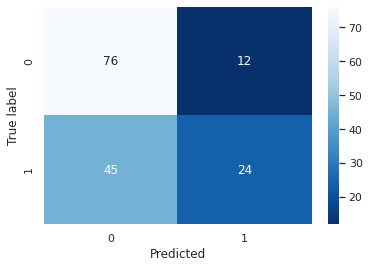

In [77]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Из матрицы ошибок видно, что:

- в 76 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 == 0);
- в 45 случаях модель неправильно относла невкусное молоко к категории 'вкусно' (0 != 1);
- в 12 случаях модель неправильно относла вкусное молоко к категории ' не вкусно' (1 != 0);
- в 24 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно';

FN надо приравнять нулю так как заказчик хочет вкусное молоко и модель не должен ошибится.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div>  

In [78]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds)

[0.5, 0.62, 0.75, 0.88]


In [79]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,y_pred_0.5,y_pred_0.62,y_pred_0.75,y_pred_0.88
0,0,0.328845,0,0,0,0
1,0,0.258643,0,0,0,0
2,0,0.378390,0,0,0,0
3,1,0.578155,1,0,0,0
4,0,0.215943,0,0,0,0


In [80]:
print('y_pred_0.5 Recall = ', recall_score(y_test, data['y_pred_0.5']))
print('y_pred_0.62 Recall = ', recall_score(data['y_valid'], data['y_pred_0.62']))
print('y_pred_0.75 Recall = ', recall_score(data['y_valid'], data['y_pred_0.75']))
print('y_pred_0.88 Recall = ', recall_score(data['y_valid'], data['y_pred_0.88']))

y_pred_0.5 Recall =  0.34782608695652173
y_pred_0.62 Recall =  0.11594202898550725
y_pred_0.75 Recall =  0.014492753623188406
y_pred_0.88 Recall =  0.0


Для того, чтобы свести ошибку второго рода к нулю, необходимо свести метрику recall к 1:

In [81]:
thresholds = [round(i,2) for i in np.linspace(0.1,0.5,num = 4,endpoint=False)]
print(thresholds)

[0.1, 0.2, 0.3, 0.4]


In [82]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4
0,0,0.328845,1,1,1,0
1,0,0.258643,1,1,0,0
2,0,0.378390,1,1,1,0
3,1,0.578155,1,1,1,1
4,0,0.215943,1,1,0,0


In [83]:
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.1 Recall =  1.0
y_pred_0.2 Recall =  1.0
y_pred_0.3 Recall =  0.8840579710144928
y_pred_0.4 Recall =  0.6376811594202898


In [84]:
thresholds = [0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.21 Recall =  1.0
y_pred_0.22 Recall =  0.9565217391304348
y_pred_0.23 Recall =  0.9565217391304348
y_pred_0.24 Recall =  0.9565217391304348
y_pred_0.25 Recall =  0.9565217391304348
y_pred_0.26 Recall =  0.9420289855072463
y_pred_0.27 Recall =  0.9420289855072463
y_pred_0.28 Recall =  0.927536231884058
y_pred_0.29 Recall =  0.9130434782608695


In [85]:
thresholds = [0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217, 0.218, 0.219]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.211 Recall =  1.0
y_pred_0.212 Recall =  0.9855072463768116
y_pred_0.213 Recall =  0.9855072463768116
y_pred_0.214 Recall =  0.9855072463768116
y_pred_0.215 Recall =  0.9855072463768116
y_pred_0.216 Recall =  0.9855072463768116
y_pred_0.217 Recall =  0.9855072463768116
y_pred_0.218 Recall =  0.9855072463768116
y_pred_0.219 Recall =  0.9710144927536232


In [86]:
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.211).astype(int)
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))

LogisticRegression model Accuracy =  0.49
LogisticRegression model Precision =  0.463
LogisticRegression model Recall =  1.0


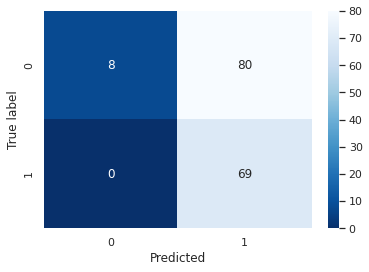

In [87]:
cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Точность модели упала, но фермер точно не купит корову, дающее невкусное молоко.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Все логично.
</div>  

#### С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

In [88]:
df_buy

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,6263.734322
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6169.023069
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,6478.112671
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,6427.169360
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,6310.403512
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,6456.283031
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,6285.563962
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,2019.532273,0.958772,6229.731154
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,2019.532273,0.958772,6502.952220


In [89]:
df_buy['eke_new'] = df_buy['eke'].apply(lambda x: x**2)
df_buy['spo_type'] = df_buy['spo'].apply(lambda x: 'более_0.92' if x>0.92 else 'менее_0.92')
df_buy

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg,eke_new,spo_type
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591,233.205675,более_0.92
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,6263.734322,233.205675,более_0.92
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6169.023069,233.205675,более_0.92
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,6478.112671,233.205675,более_0.92
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,6427.169360,233.205675,более_0.92
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,6310.403512,233.205675,более_0.92
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,6456.283031,233.205675,более_0.92
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,6285.563962,233.205675,более_0.92
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,2019.532273,0.958772,6229.731154,233.205675,более_0.92
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,2019.532273,0.958772,6502.952220,233.205675,более_0.92


In [90]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
cat_col_names = ['spo_type', 'grazing_type', 'age']
cow_buy_ohe = encoder.fit_transform(df_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

scaler = StandardScaler()
num_col_names = ['eke_new', 'protein_g', 'current_fat',	'current_protein_level']
cow_buy_scaled = scaler.fit_transform(df_buy[num_col_names])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

cow_buy_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
cow_buy_new.insert(loc=0,
                   column='x0_менее_0.92',
                   value = 0.0)
cow_buy_new.columns = ['spo_менее_0.92',
                       'grazing_type_Холмистое',
                       'age_менее_2_лет',
                       'eke_new',
                       'protein_g',
                       'fat',
                       'protein']
taste_pred = (clf.predict_proba(cow_buy_new)[:, 1] >= 0.211).astype(int)
taste_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
cow_buy_new

,spo_менее_0.92,grazing_type_Холмистое,age_менее_2_лет,eke_new,protein_g,fat,protein
0,0.0,1.0,0.0,0.0,0.0,0.059253,0.710628
1,0.0,0.0,1.0,0.0,0.0,-0.232455,1.169098
2,0.0,0.0,0.0,0.0,0.0,0.132181,0.527240
3,0.0,1.0,0.0,0.0,0.0,-1.253436,-0.664781
4,0.0,0.0,0.0,0.0,0.0,0.496816,0.527240
5,0.0,0.0,1.0,0.0,0.0,0.423889,-1.398332
6,0.0,0.0,0.0,0.0,0.0,-0.013674,0.985710
7,0.0,1.0,1.0,0.0,0.0,-1.253436,0.985710
8,0.0,1.0,0.0,0.0,0.0,1.153161,-1.214945
9,0.0,0.0,0.0,0.0,0.0,1.153161,0.435546


In [92]:
taste_pred = (clf.predict_proba(cow_buy_new)[:, 1] >= 0.35).astype(int)
taste_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [93]:
df_buy['taste'] = taste_pred
df_buy['taste'] = df_buy['taste'].map({0: 'вкусно', 1: 'не вкусно'}).astype(str)
df_buy =df_buy.drop(['eke_new', 'spo_type'], axis=1)
df_buy

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,6263.734322,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6169.023069,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,6478.112671,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,6427.169360,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,6310.403512,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,6456.283031,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,6285.563962,не вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,2019.532273,0.958772,6229.731154,не вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,2019.532273,0.958772,6502.952220,не вкусно


In [94]:
df_buy.loc[(df_buy['yield_kg'] > 6000) & (df_buy['taste'] == 'вкусно')]

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.271073,2019.532273,0.958772,6229.731154,вкусно


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Да, все без ошибок, с метриками справились)
</div>  

# Шаг 7. Сделайте итоговые выводы

**1) Загрузка данных**

- были прочитаны исходные файлы с данными;
- в каждом датафрейме для удобства были заменены имена столбцов на английский язык для удобства

**2) Предобработка данных**

Проверили данные на наличие пропусков, дубликатов и тип данных:
- Дубликатов удалили с помощю drop_duplicates
- Нету пропусков
- Поменяли там где надо с object на float64. Для удбства при расчетов.

**3) Исследовательский анализ**

**Анализ количественных показателей**
- yield_kg в датафрейме ferma_main:
Обнаружен значительный выброс, составляющий приблизительно 45 тонн молока, что указывает на потенциальную ошибку ввода данных или исключительное событие. Распределение данного показателя характеризуется асимметрией.
- eke в датафрейме ferma_main:
Выбросы отсутствуют, однако распределение показателя является асимметричным.
- 'protein_g в датафрейме ferma_main:
Выбросы не обнаружены, распределение асимметрично.
- 'spo' в датафрейме ferma_main:
Отсутствие выбросов с асимметричным распределением.
- 'fat' в датафрейме ferma_main:
Присутствует значительное количество выбросов ниже первой квартили, что может указывать на ошибки измерения или записи данных. Распределение асимметрично.
- protein в датафрейме ferma_main:
Наблюдаются единичные выбросы, тем не менее, распределение признака близко к нормальному.

**Анализ количественных показателей в датафрейме cow_buy**

- current_fat и current_protein:
В связи с ограниченным объемом данных, выбросы отсутствуют.

**Анализ категориальных признаков**

- В датафреймах ferma_main и cow_buy к категориальным признакам относятся: порода, тип пастбища, порода папы, а также вкус и возраст в ferma_main и возраст и имя папы в cow_buy. Данные признаки не вызывают подозрений на предвзятость или неадекватность.

**4) Корреляционный анализ**

На основании представленных данных и диаграмм рассеяния можно сделать следующие научно обоснованные выводы о взаимосвязях между целевым признаком "удой (кг)" и другими переменными:

1. **Линейная корреляция:**
   - Между целевым признаком "удой (кг)" и переменной "сырой протеин (г)" наблюдается линейная зависимость. Это указывает на прямую пропорциональность удоя к количеству протеина, что может быть обусловлено его важной ролью в продуктивности молочных животных.

2. **Нелинейные связи:**
   - Целевой признак демонстрирует нелинейные зависимости с такими переменными, как ЭКЕ (энергетическая корректировка удоя), СПО (содержание сырого протеина в организме), жирность и белок в процентном отношении. Эти сложные взаимосвязи могут отражать различные биологические процессы, влияющие на удой, которые не поддаются простому линейному описанию.

3. **Корреляционный анализ:**
   - Сильная корреляция с признаками ЭКЕ, СПО и возрастом подтверждает их значимость в определении удоя. Умеренная корреляция с "сырым протеином (г)" и породой отца указывает на их влияние, но в меньшей степени. Слабая корреляция с жирностью, белком, породой и типом пастбища может свидетельствовать о косвенном или менее значимом влиянии этих факторов.

4. **Масштабирование и трансформация переменных:**
   - Нелинейные связи между признаками могут быть частично обусловлены различиями в масштабах переменных. Проведение масштабирования или трансформации признаков может помочь улучшить интерпретируемость моделей и повысить точность прогнозирования.

5. **Мультиколлинеарность:**
   - Хотя наблюдается потенциальная связь между ЭКЕ и "сырым протеином (г)", отсутствие высокой степени линейной корреляции между ними и другими входными признаками свидетельствует об отсутствии значимой мультиколлинеарности. Это позволяет использовать все рассматриваемые признаки в аналитических моделях без риска искажения результатов из-за высокой взаимной корреляции.

Таким образом, анализ показывает, что для адекватного моделирования взаимосвязи между удоем и входными переменными потребуется учет как линейных, так и нелинейных связей, а также возможное введение методов масштабирования и трансформации данных для более точного и стабильного описания наблюдаемых явлений.

5) Регрессия



In [95]:
df_buy.head()

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,6263.734322,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6169.023069,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,6478.112671,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,6427.169360,не вкусно


In [96]:
df_buy.loc[(df_buy['yield_kg'] > 6000) & (df_buy['taste'] == 'вкусно')]

,breed,grazing_type,dad_breed,dads_name,current_fat,current_protein_level,age,eke,protein_g,spo,yield_kg,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6494.942591,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.271073,2019.532273,0.958772,6229.731154,вкусно




### > Среди 16 вариантов было выявлено 2, подходящих фермеру::






В рамках проведённого исследования основной задачей было минимизировать риск ошибочной классификации невкусного молока как вкусного, поскольку для заказчика ключевым аспектом было качество молока. Второстепенной, но важной целью было обеспечение удоя коров на уровне не менее 6000 кг в год.

**Анализ работы моделей**


В результате анализа были получены данные, которые были интегрированы в датафрейм cow_buy, содержащий сведения о продаваемых коровах. Исследование включало следующие аспекты:

**Линейная регрессия**

Модель линейной регрессии применялась для количественной оценки удоя коров. Рассмотрены три подхода с различным набором входных признаков:

В первом варианте использовались признаки, такие как 'эке', 'сырой протеин(г)', 'спо', 'возраст', 'порода папы'. Модель демонстрировала коэффициент детерминации
𝑅
2
=
0.7844
R
2
 =0.7844, указывающий на высокую степень завышения прогнозных значений, что отражалось в асимметрии остатков. Эта модель была нестабильной и допускала значительные ошибки в прогнозах.
Во втором подходе, для устранения нелинейности между 'эке', 'спо' и 'удой(кг)', были трансформированы 'спо' и возведено в квадрат 'эке'. Модель показала улучшенный
𝑅
2
=
0.818
R
2
 =0.818, с меньшим смещением в остатках и более стабильной дисперсией ошибок.
Третий вариант включал дополнительный входной признак 'имя папы'. Результаты этой модели
𝑅
2
=
0.824
R
2
 =0.824 указывали на симметричное нормальное распределение остатков и повышенную стабильность.

**Логистическая регрессия**

Для качественной оценки вкуса молока использовалась модель логистической регрессии. Было рассмотрено два варианта входных признаков:

Первый вариант включал все доступные признаки, что привело к следующим показателям: точность (Accuracy) - 0.631, точность (Precision) - 0.657, полнота (Recall) - 0.333.
Второй вариант исключал 'породу', 'породу папы' и 'имя папы', использовались трансформированные 'эке_2' и 'спо'. Метрики показали улучшение: точность - 0.637, точность - 0.667, полнота - 0.348.
Заключение исследования подчеркивает важность выбора порога классификации. Анализ оптимального порога показал, что значение 0.211 минимизирует ошибки False Negative, однако при этом значении модель не позволяла совершить покупку. Повышение порога до 0.35 увеличивало ошибку, но позволяло совершить покупку двух

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В задании проекта нас просят в общем выводе написать, как можем улучшить качество моделей. Также были вопросы по метрикам. 
       
</div> 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Работа была объемной, требовала концентрации внимания, погружения в тему и применения большого числа теоретических знаний. 

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Внимательная предобработка и качественный исследовательский анализ. Отличное оформление графиков.
* Хорошее обучение моделей. Верная интерпретация метрик.
    
**На что стоит обратить внимание🤔**
    
* Важно удалить аномалию в удое до исследовательского анализа.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>
 


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

